<a href="https://colab.research.google.com/github/prachigupta2006/feature-engineering/blob/main/outlier_treatment_with_percentile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
from google.colab import files
uploaded = files.upload()

Saving weight-height.csv to weight-height.csv


In [3]:
df= pd.read_csv('weight-height.csv')

In [4]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: xlabel='Weight', ylabel='Count'>

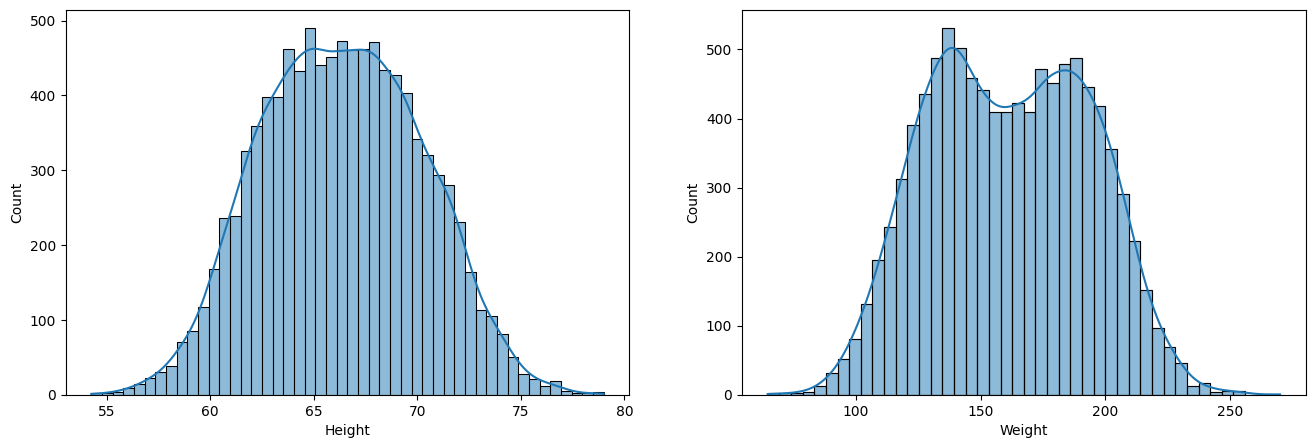

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['Height'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['Weight'],kde=True)

<Axes: ylabel='Height'>

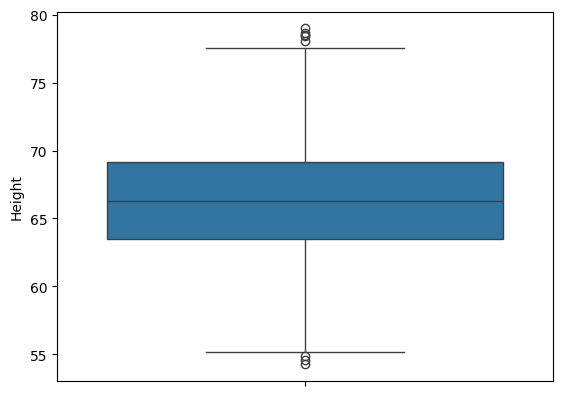

In [18]:
sns.boxplot(df['Height'])

<Axes: ylabel='Weight'>

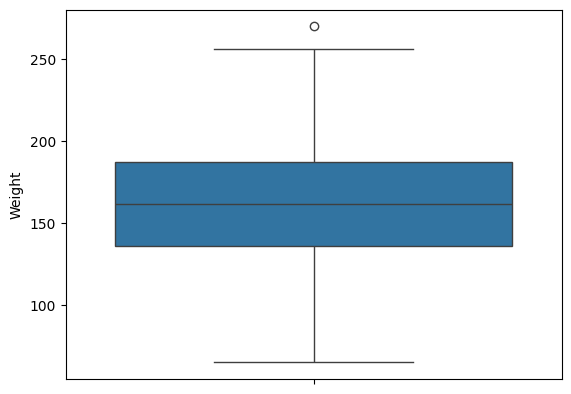

In [9]:
sns.boxplot(df['Weight'])

In [6]:
df.isnull().sum()

,0
Gender,0
Height,0
Weight,0


In [7]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


QUARTILE/PERCENTILE RANGES

In [42]:
min_=df['Height'].quantile(0.01)
max_=df['Height'].quantile(0.99)
print("min=",min_,"max=",max_)

min= 58.13441158671655 max= 74.7857900583366


# **TRIMMING**

In [43]:
new_df = df[(df['Height']<75 ) & (df['Height'] > 58)]
new_df

,Gender,Height,Weight,Height.capped
0,Male,73.847017,241.893563,73.847017
1,Male,68.781904,162.310473,68.781904
2,Male,74.110105,212.740856,74.110105
3,Male,71.730978,220.042470,71.730978
4,Male,69.881796,206.349801,69.881796
...,...,...,...,...
9995,Female,66.172652,136.777454,66.172652
9996,Female,67.067155,170.867906,67.067155
9997,Female,63.867992,128.475319,63.867992
9998,Female,69.034243,163.852461,69.034243


# PLOTTING

Text(0.5, 1.0, 'trimmed data ')

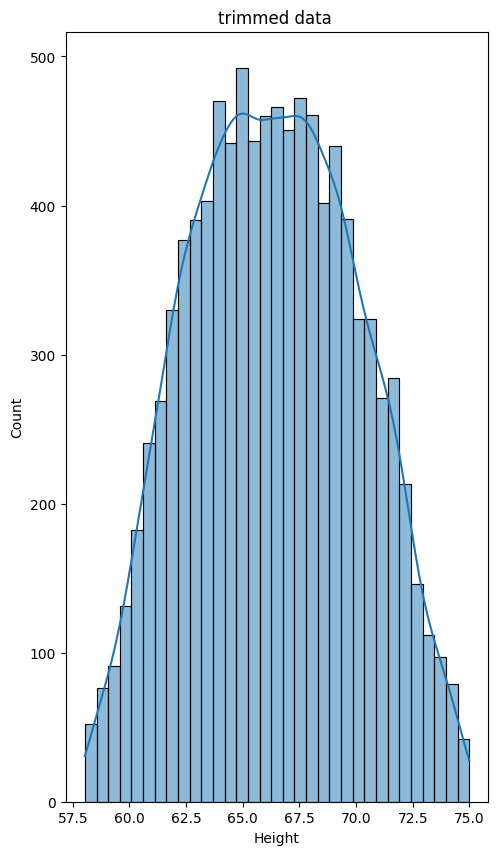

In [44]:
plt.figure(figsize=(12,10))

plt.subplot(1,2,2)
sns.histplot(new_df['Height'],kde=True)
plt.title("trimmed data ")

# BOX-PLOT

<Axes: ylabel='Height'>

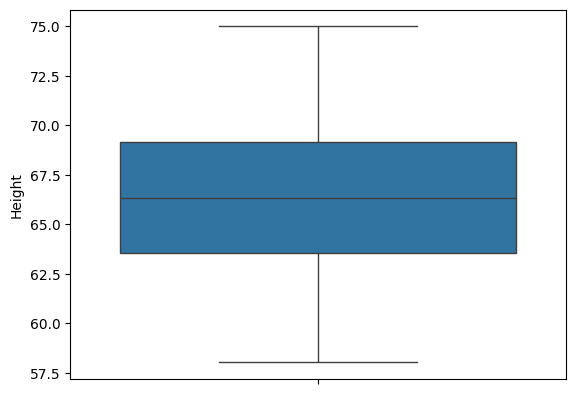

In [45]:
sns.boxplot(new_df['Height'])

# **CAPPING**

here we cap the data by putting the upper and lower limits and make new plot

In [47]:
df['Height.capped'] = np.where(
    df['Height']>max_,
    max_,
    np.where(
        df['Height']<min_,
        min_,
        df['Height']
    )
)

In [48]:
df.shape

(10000, 4)

In [49]:
df["Height.capped"].describe()

,Height.capped
count,10000.000000
mean,66.366281
std,3.795717
min,58.134412
25%,63.505620
50%,66.318070
75%,69.174262
max,74.785790


# PLOTTING

Text(0.5, 1.0, 'capped data')

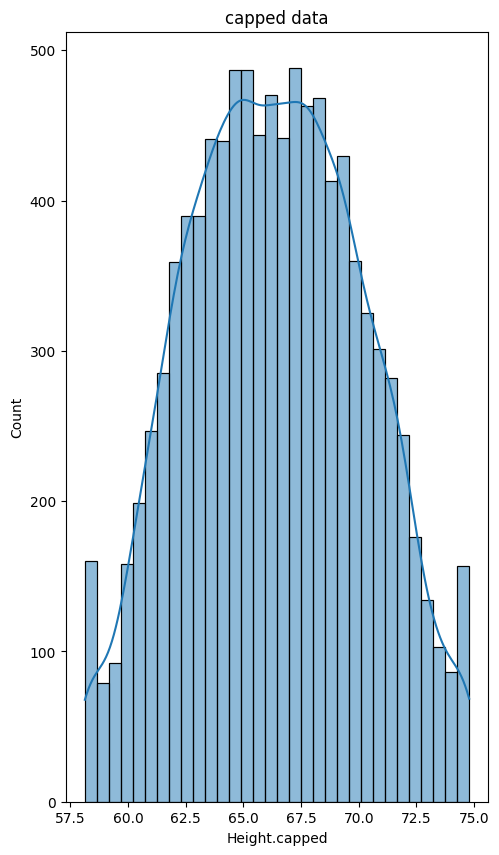

In [50]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,2)
sns.histplot(df['Height.capped'],kde=True)
plt.title("capped data")

# BOXPLOT

<Axes: ylabel='Height.capped'>

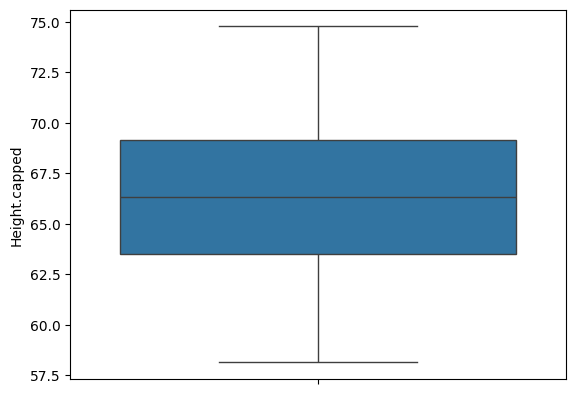

In [51]:
sns.boxplot(df['Height.capped'])